In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'data\dados_eolicos.xlsx',index_col="TS",parse_dates=True,usecols=["TS","V1","V2"])
df

,V1,V2
TS,,
2023-06-26 00:00:00,7.120,7.212
2023-06-26 00:10:00,5.540,5.584
2023-06-26 00:20:00,5.194,5.222
2023-06-26 00:30:00,5.200,5.231
2023-06-26 00:40:00,4.720,4.749
...,...,...
2025-03-31 23:10:00,1.845,NaN
2025-03-31 23:20:00,1.813,NaN
2025-03-31 23:30:00,1.059,NaN


In [3]:
df.describe()

,V1,V2
count,90186.000000,75622.000000
mean,6.334775,6.427678
std,3.020165,3.142106
min,0.132000,0.132000
25%,4.200000,4.199000
50%,6.027000,6.118000
75%,8.050750,8.247000
max,18.883000,18.871000


In [4]:
df.isna().sum()

V1     1397
V2    15961
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

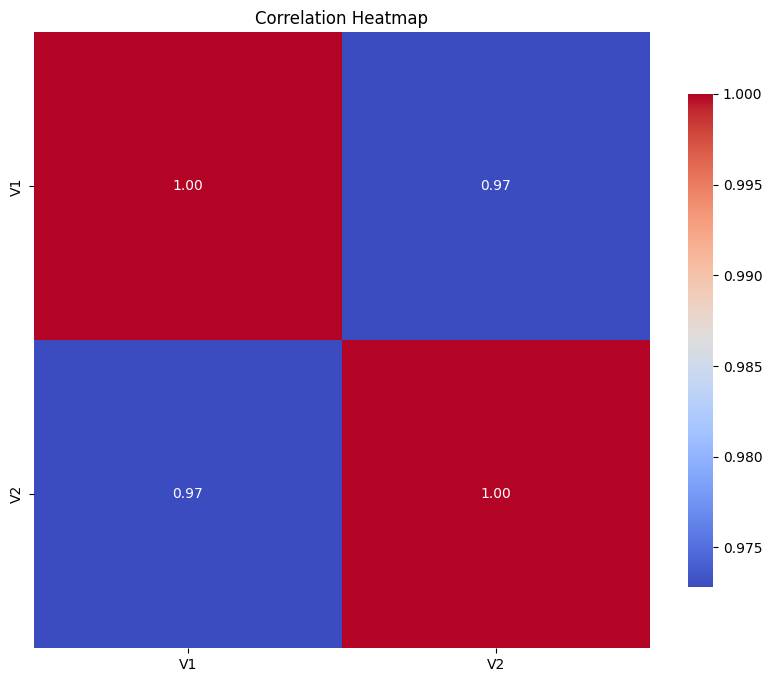

In [5]:
corr= df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')

In [6]:
# ...existente...
df["V1"] = df["V1"].interpolate(method='time')
df["V2"] = df["V2"].fillna(df["V1"])
df.isna().sum()
# ...existente...

V1    0
V2    0
dtype: int64

<Axes: xlabel='TS'>

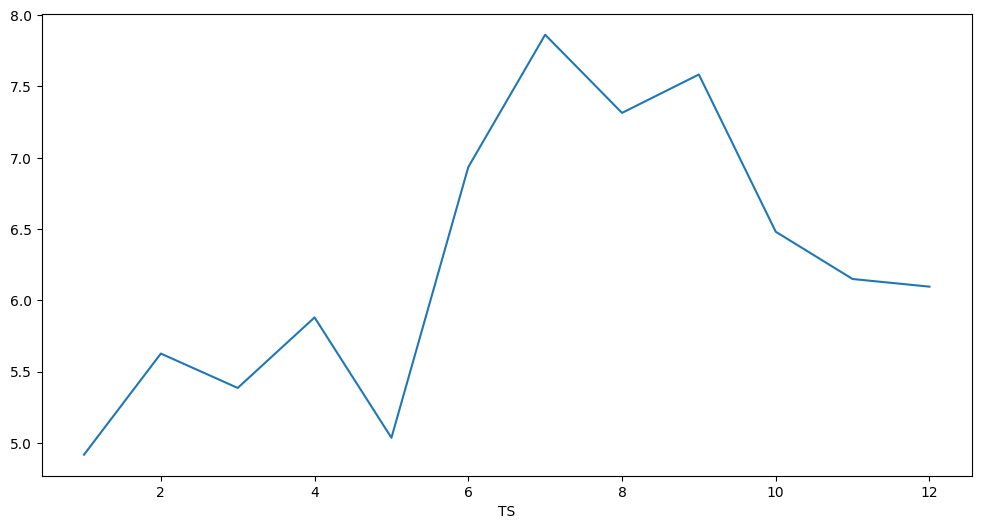

In [7]:
media_mensal = df.groupby(df.index.month).mean()["V1"]
media_mensal.plot(figsize=(12, 6))

<Axes: xlabel='TS'>

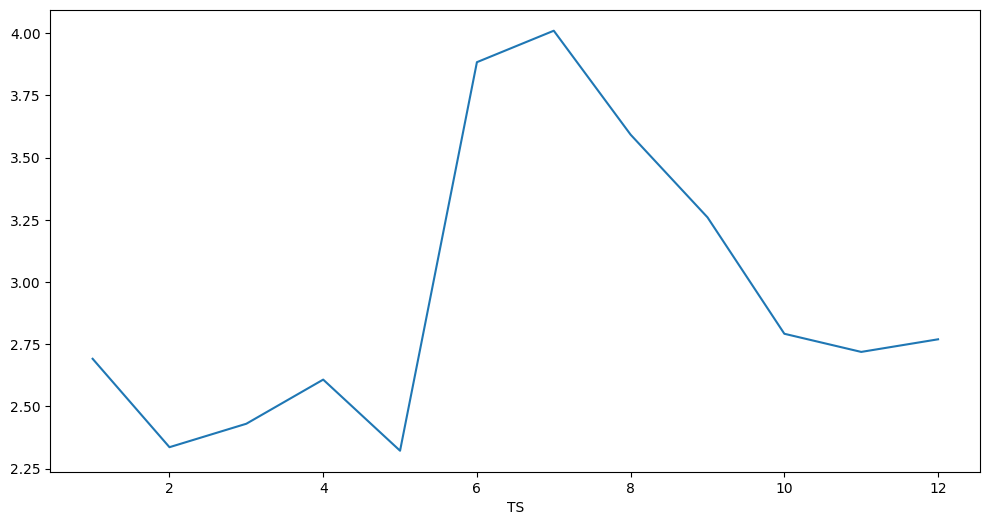

In [8]:
variabilidade_mensal = df.groupby(df.index.month).std()["V1"]
variabilidade_mensal.plot(figsize=(12, 6))

Text(0.5, 0, 'Mês')

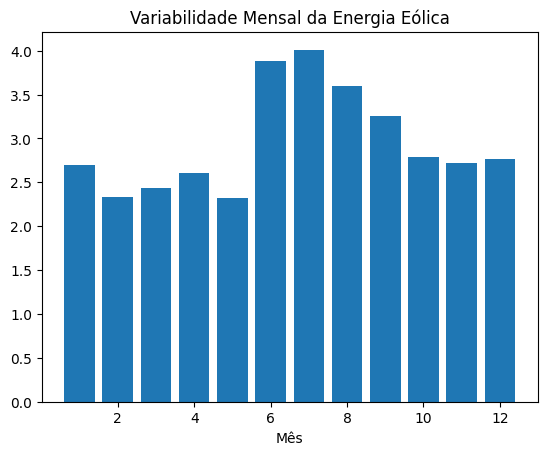

In [9]:
plt.bar(variabilidade_mensal.index, variabilidade_mensal.values)
plt.title('Variabilidade Mensal da Energia Eólica')
plt.xlabel('Mês')

<Axes: xlabel='TS'>

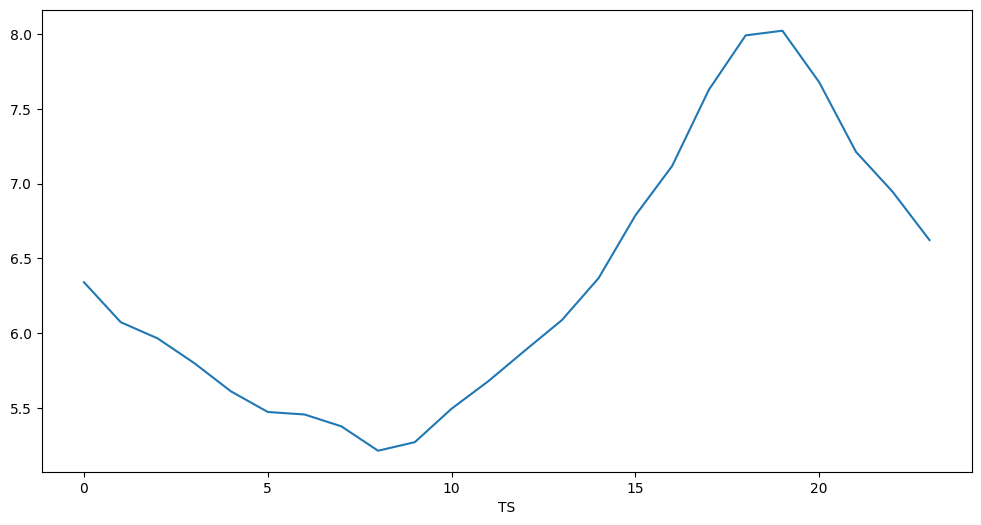

In [10]:
media_horaria = df.groupby(df.index.hour).mean()["V1"]
media_horaria.plot(figsize=(12, 6))